# Kaggle Housing Price Prediction #

<br>
<br>

__[link to Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)__

Notebook and analysis by: Laura Liisa Koldekivi, Anna-Stina Reinas, Abhishek Giri

## Preparation ##

<br>
<br>
Importing first necessary libraries and loading needed files.

Importing other necessary libraries as we go on.

In [1]:
import warnings
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from dython.nominal import  compute_associations

# mute warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [2]:
# importing datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# checking our training data

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking our training data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From this we can see that some features won't be relevant in our analysis as they have too many missing values. Concentrating on features that give us a real insight.

<br>
<br>

### Checking target variable distribution ###

<br>

Here we are analysing our target vairable. In this dataset it is SalePrice. We will analyse its distribution.

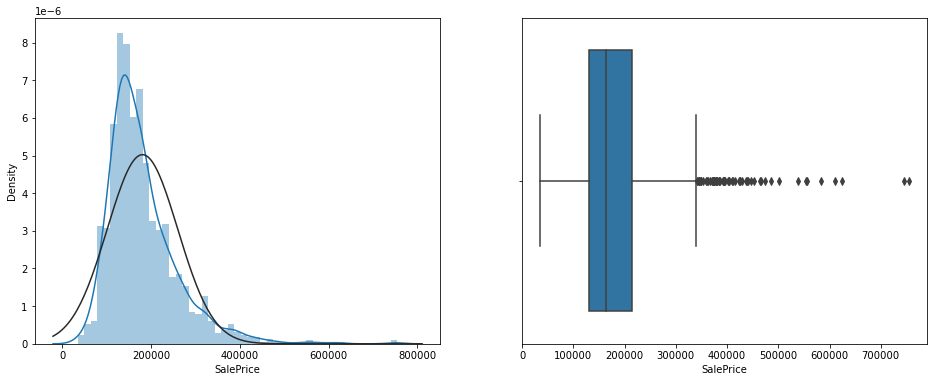

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
--------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(train_df['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(train_df['SalePrice'])
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(train_df['SalePrice'].skew()))
print("Kurtosis: {}".format(train_df['SalePrice'].kurt()))
print("--------------------------------------")
print(train_df['SalePrice'].describe())

We can see that the target variable is rightly skewed and it has some outliers at the upper end.

<br>
<br>

In [6]:
# checking shape and size of dataset

print(f"Shape of train set: {train_df.shape}")
print(f"Shape of test set: {test_df.shape}")

Shape of train set: (1460, 81)
Shape of test set: (1459, 80)


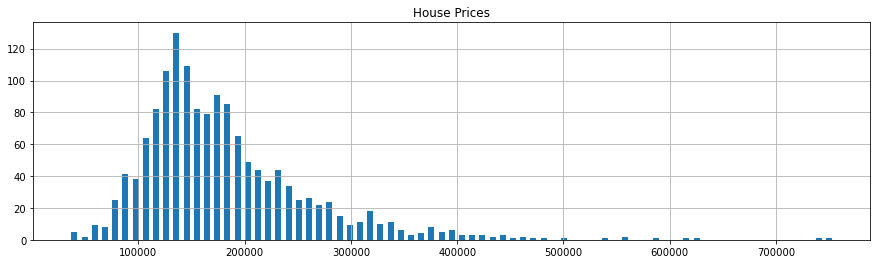

In [7]:
# plotting houses and sale price

train_df.SalePrice.hist(bins=75,rwidth = 0.6,figsize=(15,4),grid=True)
plt.title('House Prices')
plt.show()

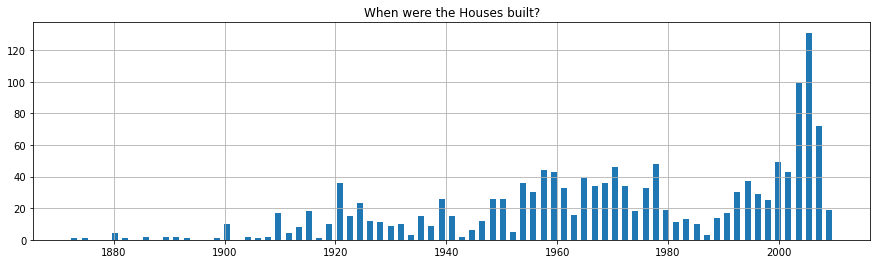

In [8]:
# plotting year built and units 

train_df.YearBuilt.hist(bins=75,rwidth=0.6,figsize=(15,4))
plt.title('When were the Houses built?')
plt.show()

#### Correlation ###

<br>
<br>

We will now find which features are strongly correlated with SalePrice.

In [9]:
# separating numerical and categorical columns

numeric_cols = [cname for cname in train_df.columns if train_df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_df.columns if train_df[cname].dtype == 'object' ]

               SalePrice
KitchenAbvGr   -0.135907
EnclosedPorch  -0.128578
MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
LowQualFinSF   -0.025606
Id             -0.021917
MiscVal        -0.021190
BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
PoolArea        0.092404
ScreenPorch     0.111447
BedroomAbvGr    0.168213
LotFrontage     0.209624
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
GarageYrBlt     0.261366
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.472614
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000


Text(0.5, 1.0, ' Corelations between SalePrice and numerical features.')

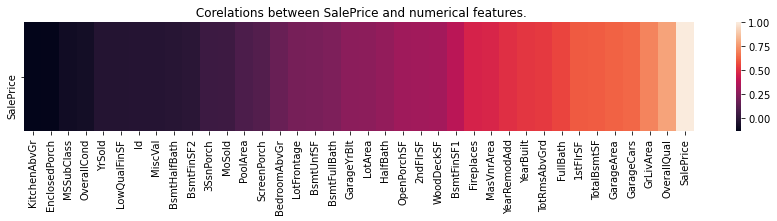

In [10]:
# plotting correrlation b/w numerical attributes and sale price

plt.subplots(figsize=(15,2))
numerical_corr_table = compute_associations(train_df[numeric_cols])
print(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(numerical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Corelations between {'SalePrice'} and numerical features.")

# numerical_corr_table

In [11]:
categorical_cols.append('SalePrice')

               SalePrice
Utilities       0.014314
Street          0.041036
LandSlope       0.051784
MiscFeature     0.084141
Condition2      0.099495
Heating         0.120155
Functional      0.128376
Alley           0.142855
LotConfig       0.144981
PoolQC          0.145588
ExterCond       0.153680
LandContour     0.160605
BsmtFinType2    0.174052
RoofMatl        0.177237
Condition1      0.180640
BldgType        0.185833
Fence           0.188719
BsmtCond        0.226706
PavedDrive      0.233537
RoofStyle       0.240201
Electrical      0.244318
CentralAir      0.251328
LotShape        0.276362
GarageCond      0.285213
GarageQual      0.285344
HouseStyle      0.293790
MSZoning        0.327963
SaleCondition   0.368100
SaleType        0.370523
BsmtExposure    0.386653
Exterior1st     0.390862
Exterior2nd     0.392211
MasVnrType      0.434537
HeatingQC       0.442154
BsmtFinType1    0.459141
GarageType      0.499204
Foundation      0.506328
FireplaceQu     0.542181
GarageFinish    0.553059


Text(0.5, 1.0, ' Correlations between SalePrice and categorical features.')

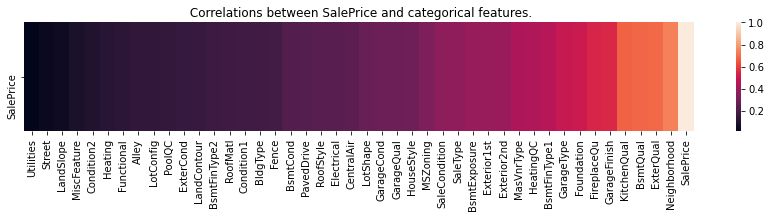

In [12]:
#plotting correrlation b/w categorical attributes and sale price

plt.subplots(figsize=(15,2))
categorical_corr_table = compute_associations(train_df[categorical_cols])
print(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']))
sns.heatmap(categorical_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
plt.title(f" Correlations between {'SalePrice'} and categorical features.")

<br>
<br>
<br>

Creating seperate table for numerical and categorical columns that have a correlation of more than 0.4 to SalePrice.

In [13]:
num_correlated = numerical_corr_table[['SalePrice']][numerical_corr_table['SalePrice']>0.4].index.tolist()
cat_correlated = categorical_corr_table[['SalePrice']][categorical_corr_table['SalePrice']>0.4].index.tolist()

In [14]:
# all numerical columns that have a correlation bigger than 40%

num_correlated

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [15]:
# all categorical columns that have a correlation bigger than 40%

cat_correlated

['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SalePrice']

<br>

### Imputing missing values ###

<br>
<br>


In [16]:
#identifying null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

LotFrontage has 259 null values
Alley has 1369 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [17]:
#identifying null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

MSZoning has 4 null values
LotFrontage has 227 null values
Alley has 1352 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
PoolQC has 1456 null values
Fence has 1169 null values
MiscFeature has 1408 null values
SaleType has 1 null values


In [18]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values
#Dropping ID column because no relevant information

train_df.drop('Alley',
  axis=1, inplace=True)

train_df.drop('PoolQC',
  axis=1, inplace=True)

train_df.drop('Fence',
  axis=1, inplace=True)

train_df.drop('MiscFeature',
  axis=1, inplace=True)

train_df.drop(['Id'],axis=1,inplace=True)

In [19]:
#Dropping Alley, PoolQC, Fence, MiscFeature as it has low correlation and high missing values
#Dropping ID column because no relevant information

test_df.drop('Alley',
  axis=1, inplace=True)

test_df.drop('PoolQC',
  axis=1, inplace=True)

test_df.drop('Fence',
  axis=1, inplace=True)

test_df.drop('MiscFeature',
  axis=1, inplace=True)

test_df.drop(['Id'],axis=1,inplace=True)

In [20]:
#value counts to replace null values

test_df['MSZoning'].value_counts()
test_df['Utilities'].value_counts()
test_df['Exterior1st'].value_counts()
test_df['Exterior2nd'].value_counts()
test_df['BsmtFullBath'].value_counts()
test_df['BsmtHalfBath'].value_counts()
test_df['KitchenQual'].value_counts()
test_df['Functional'].value_counts()
test_df['GarageCars'].value_counts()
test_df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [21]:
#Replacing Null values with appropriate alternative

train_df['LotFrontage'].fillna((train_df['LotFrontage'].median()), inplace=True)
train_df['MasVnrType'].fillna("None", inplace=True)
train_df['MasVnrArea'].fillna((train_df['MasVnrArea'].median()), inplace=True)

train_df['BsmtQual'].fillna("NB", inplace=True)
train_df['BsmtCond'].fillna("NB", inplace=True)
train_df['BsmtExposure'].fillna("NB", inplace=True)
train_df['BsmtFinType1'].fillna("NB", inplace=True)
train_df['BsmtFinType2'].fillna("NB", inplace=True)

train_df['FireplaceQu'].fillna("NF", inplace=True)

train_df['Electrical'].fillna((train_df['Electrical'].mode()[0]), inplace=True)

train_df['GarageType'].fillna("NG", inplace=True)
train_df['GarageYrBlt'].fillna((train_df['MasVnrArea'].mean()), inplace=True) #to not make a big change in variance
train_df['GarageFinish'].fillna("NG", inplace=True)
train_df['GarageQual'].fillna("NG", inplace=True)
train_df['GarageCond'].fillna("NG", inplace=True)
train_df['Electrical'].fillna("SBrkr", inplace=True)

In [22]:
#Replacing Null values with appropriate alternative

test_df['LotFrontage'].fillna((test_df['LotFrontage'].median()), inplace=True)
test_df['MasVnrType'].fillna("None", inplace=True)
test_df['MasVnrArea'].fillna((test_df['MasVnrArea'].median()), inplace=True)
test_df['MSZoning'].fillna("RL", inplace=True)
test_df['Utilities'].fillna("AllPub", inplace=True)

test_df['BsmtQual'].fillna("NB", inplace=True)
test_df['BsmtCond'].fillna("NB", inplace=True)
test_df['BsmtExposure'].fillna("NB", inplace=True)
test_df['BsmtFinType1'].fillna("NB", inplace=True)
test_df['BsmtFinType2'].fillna("NB", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['MasVnrArea'].mean()), inplace=True)

test_df['BsmtFinSF1'].fillna((test_df['BsmtFinSF1'].mean()), inplace=True)
test_df['BsmtFinSF2'].fillna((test_df['BsmtFinSF2'].mean()), inplace=True)
test_df['BsmtUnfSF'].fillna((test_df['BsmtUnfSF'].mean()), inplace=True)
test_df['TotalBsmtSF'].fillna((test_df['TotalBsmtSF'].mean()), inplace=True)

test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)

test_df['KitchenQual'].fillna("TA", inplace=True)

test_df['Functional'].fillna("Typ", inplace=True)

test_df['GarageCars'].fillna(2, inplace=True)
test_df['GarageArea'].fillna((test_df['GarageArea'].mean()), inplace=True)

test_df['SaleType'].fillna("WD", inplace=True)

test_df['Exterior1st'].fillna("VinylSd", inplace=True)
test_df['Exterior2nd'].fillna("VinylSd", inplace=True)

test_df['FireplaceQu'].fillna("NF", inplace=True)

test_df['GarageType'].fillna("NG", inplace=True)
test_df['GarageYrBlt'].fillna((test_df['GarageYrBlt'].mean()), inplace=True) #to not make a big change in variance
test_df['GarageFinish'].fillna("NG", inplace=True)
test_df['GarageQual'].fillna("NG", inplace=True)
test_df['GarageCond'].fillna("NG", inplace=True)

<br>
<br>

After imputation checking no. of missing values again.

In [23]:
#recheck null values

for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

In [24]:
#recheck null values

for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

Every missing value has been taken care of.

<br>
<br>

### Removing outliers

<br>

Plotting scatter plots for all numerical features

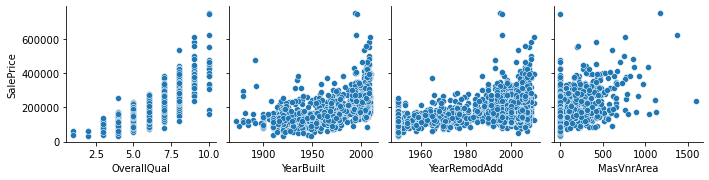

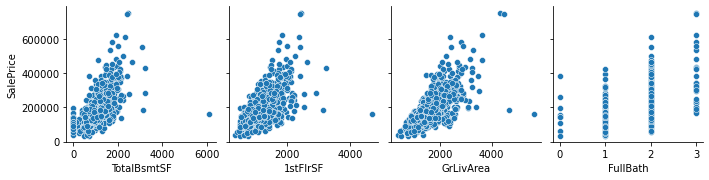

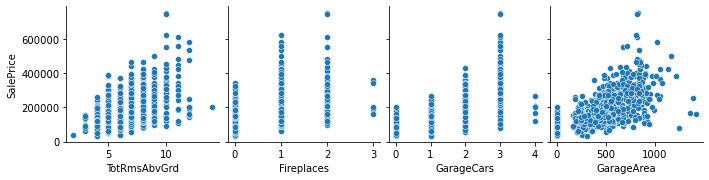

In [25]:
sns.pairplot(train_df,x_vars=['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea'], y_vars=["SalePrice"], kind="scatter")
sns.pairplot(train_df,x_vars=['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath'], y_vars=["SalePrice"], kind="scatter")
sns.pairplot(train_df,x_vars=['TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea'], y_vars=["SalePrice"], kind="scatter")

We can see that there are outliers for thee variables - TotalBsmtSF, 1stFlrSF, and GrLivArea. Next will remove outliers

In [28]:
#Outliers in TotalBsmtSF, 1stFlrSF and GrlivArea
#removing outliers:
train_df= train_df[train_df["TotalBsmtSF"]<3000]
train_df= train_df[train_df["1stFlrSF"]<3000]
train_df= train_df[train_df["GrLivArea"]<4000]
train_df.shape #lost 7 rows

(1453, 76)

Plotting again to see the result

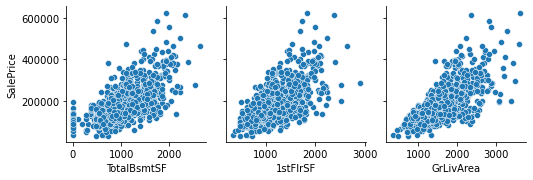

In [27]:
sns.pairplot(train_df,x_vars=['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',], y_vars=["SalePrice"], kind="scatter")

<br>
<br>

### Preparing train and test to be joined

<br>

In [29]:
#creating copy of train and test with only features that have higher than 0.4 correlation

traincopy = train_df.copy()
testcopy = test_df.copy()

In [30]:
#only leaving values that have higher than 0.4 correlation, dropping everything else

traincopy.drop(['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
"MSZoning",
"Street", 
"LotShape",
"LandContour", 
"Utilities",
"LotConfig",
"LandSlope",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"ExterCond",
"BsmtCond",
"BsmtExposure",
"BsmtFinType2",
"Heating",
"CentralAir",
"Electrical",
"Functional",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"], axis=1, inplace = True)

testcopy.drop(['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
"MSZoning",
"Street", 
"LotShape",
"LandContour", 
"Utilities",
"LotConfig",
"LandSlope",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"ExterCond",
"BsmtCond",
"BsmtExposure",
"BsmtFinType2",
"Heating",
"CentralAir",
"Electrical",
"Functional",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"], axis=1, inplace = True)

In [31]:
traincopy.shape

(1453, 24)

In [32]:
traincopy.head()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,SalePrice
0,CollgCr,7,2003,2003,BrkFace,196.0,Gd,PConc,Gd,GLQ,...,2,Gd,8,0,NF,Attchd,RFn,2,548,208500
1,Veenker,6,1976,1976,None,0.0,TA,CBlock,Gd,ALQ,...,2,TA,6,1,TA,Attchd,RFn,2,460,181500
2,CollgCr,7,2001,2002,BrkFace,162.0,Gd,PConc,Gd,GLQ,...,2,Gd,6,1,TA,Attchd,RFn,2,608,223500
3,Crawfor,7,1915,1970,None,0.0,TA,BrkTil,TA,ALQ,...,1,Gd,7,1,Gd,Detchd,Unf,3,642,140000
4,NoRidge,8,2000,2000,BrkFace,350.0,Gd,PConc,Gd,GLQ,...,2,Gd,9,1,TA,Attchd,RFn,3,836,250000


In [33]:
# making copies of train and test and joining them into one dataset

df1 = traincopy.copy()
df1['source'] = 'train'
df2 = testcopy.copy()
df2['source'] = 'test'

data = pd.concat([df1, df2])

<br>

## Getting dummy values

<br>

In [34]:
testcopy.select_dtypes(include=['object']).columns.tolist()

['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [35]:
g = data.columns.to_series().groupby(data.dtypes).groups
data_dum = pd.get_dummies(data, columns=['Neighborhood',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish'])

In [36]:
train = data_dum[data_dum["source"] == "train"]
test = data_dum[data_dum["source"] == "test"]

In [37]:
# checking train after getting dummies

train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,7,2003,2003,196.0,856.0,856,1710,2,8,0,...,1,0,0,0,0,0,0,0,1,0
1,6,1976,1976,0.0,1262.0,1262,1262,2,6,1,...,1,0,0,0,0,0,0,0,1,0
2,7,2001,2002,162.0,920.0,920,1786,2,6,1,...,1,0,0,0,0,0,0,0,1,0
3,7,1915,1970,0.0,756.0,961,1717,1,7,1,...,0,0,0,0,1,0,0,0,0,1
4,8,2000,2000,350.0,1145.0,1145,2198,2,9,1,...,1,0,0,0,0,0,0,0,1,0


In [38]:
# checking test after getting dummies

test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_Fin,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,5,1961,1961,0.0,882.0,896,896,1,5,0,...,1,0,0,0,0,0,0,0,0,1
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,...,1,0,0,0,0,0,0,0,0,1
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,...,1,0,0,0,0,0,1,0,0,0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,...,1,0,0,0,0,0,1,0,0,0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,...,1,0,0,0,0,0,0,0,1,0


In [39]:
# dropping column we made for separating after making dummies

train.drop(columns=["source"], axis=1, inplace=True)
test.drop(columns=["source"], axis=1, inplace=True)

In [40]:
test.drop(columns=["SalePrice"], axis=1, inplace=True)

In [41]:
print(f"Shape of train set: {train.shape}")
print(f"Shape of test set: {test.shape}")

Shape of train set: (1453, 90)
Shape of test set: (1459, 89)


# not sure how to explain this but it looks important?

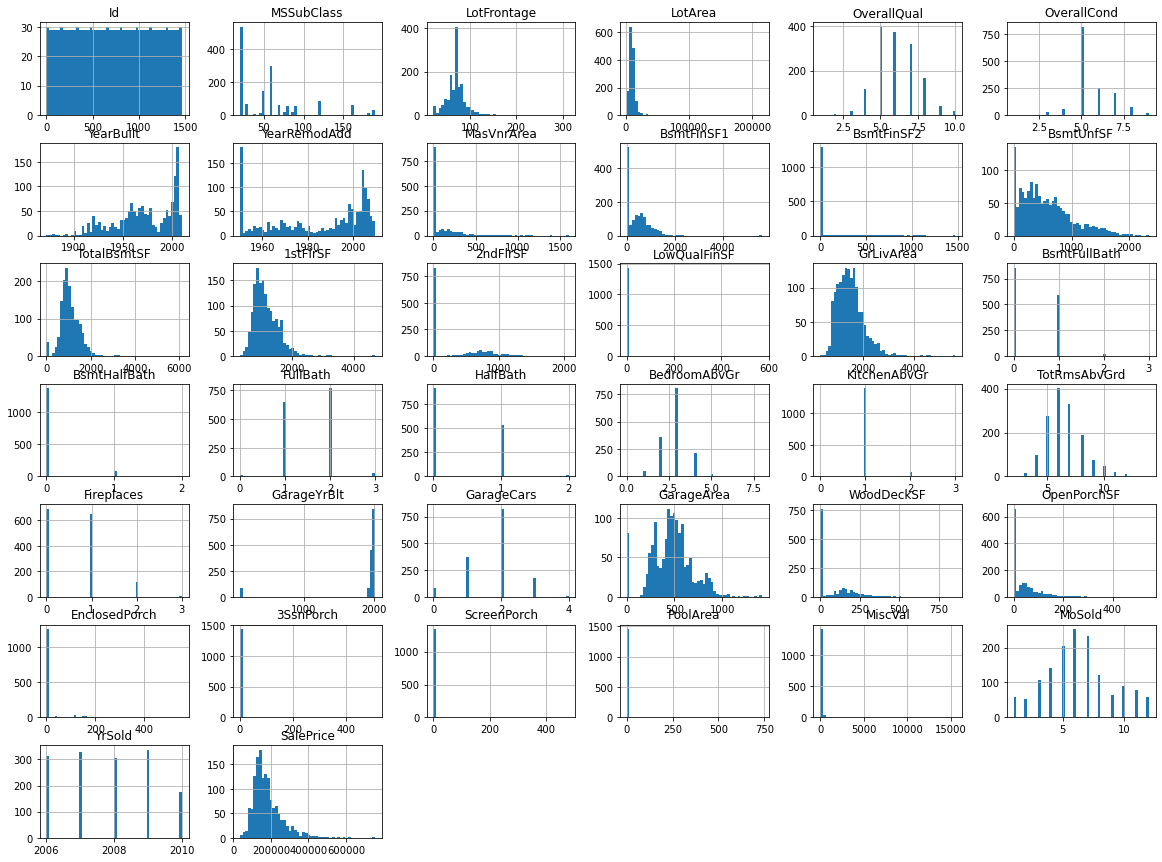

In [40]:
df_quant = train_df[numeric_cols]
df_quant.hist(bins=50, figsize = (20,15))
plt.show()

# Training various models

Now that we have finished with data preparation, we will start training different models. Starting with linear regression, then lasso, ridge, random forest and finally xgboost. We will fit the models to data, export result as a csv and upload it to kaggle to get the RMSE score. Our goal was to be in the top 50%, so our RMSE needs to be less than 0,145.

In [43]:
#code to export submissions as CSV
def tocsv(filename, y_pred):
    prob = pd.DataFrame(y_pred)
    prob["Id"] = np.arange(len(X_train)+8, len(X_train)+len(y_pred)+8)
    prob.columns=["SalePrice", "Id"]
    prob=prob.reindex(columns=["Id", "SalePrice"])
    prob.to_csv(filename, index=False)

# Linear regression

In [46]:
X_train = train.drop(columns=["SalePrice"])
y_train = train.SalePrice
X_test=test

In [58]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [59]:
model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_test)
tocsv("linearregressionfirst.csv",y_predict)

Kaggle RMSE score: 0.16796

# Lasso

In [60]:
# importing necessary libraries

from sklearn.linear_model import Lasso
from sklearn import linear_model

In [61]:
lasso = linear_model.Lasso().fit(X_train, y_train)
y_predict = lasso.predict(X_test)
tocsv("lassoregression.csv",y_predict)

Kaggle RMSE score: 0.16794

# Ridge

In [62]:
# importing necessary libraries

from sklearn.linear_model import Ridge

In [63]:
ridge = linear_model.Ridge().fit(X_train, y_train)
y_predict = ridge.predict(X_test)
tocsv("ridgeregression.csv",y_predict)

Kaggle RMSE score: 0.16775

# Cross-validation

No improvement in results so trying cross-validation on training dataset to find better regularization parameter alpha for Ridge and Lasso regression models.

In [64]:
# importing necessary libraries

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [65]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, shuffle=False) #kernel crashed, removed random state
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [66]:
ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

Ridge best alpha 3.5000 - Avg MSE 670616299.0539 
Lasso best alpha 5.0000 - Avg MSE 676092847.9939 


In [67]:
ridgealpha = linear_model.Ridge(alpha=3.5).fit(X_train, y_train)
y_predict = ridgealpha.predict(X_test)
tocsv("ridgealpha.csv",y_predict)


Kaggle RMSE score: 0.16804

In [68]:
lassoalpha = linear_model.Lasso(alpha=5).fit(X_train, y_train)
y_predict = lassoalpha.predict(X_test)
tocsv("lassoalpha.csv",y_predict)

Kaggle RMSE score:0.16820

Small improvement, but still no where close to a result that will be in the top 50%.

# Random forest regressor

In [72]:
# importing necessary libraries

from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
tocsv("randomforestfirst.csv",y_predict)

Kaggle RMSE score: 0.15476

Improvement compared to linear, lasso and ridge regression.

# Hyperparameter tuning for Random Forest 

__[source](https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb)__

In [64]:
#parameters currently in use

from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [65]:
# Random Search with Cross Validation

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model

#rf_random.fit(features, labels); (commented, because it takes 15-20 minutes to run)

In [68]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [69]:
# Using GridSearch around the best values returned by random search.

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [70]:
#grid_search.fit(features, labels); (commented, because it takes 5 minutes to run)

In [71]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [74]:
# applying best parameters to RandomForestRegressor
rfrhyper = RandomForestRegressor(max_depth=50, max_features=6, min_samples_leaf=1, min_samples_split=4, bootstrap=False, n_estimators =1600)
rfrhyper.fit(X_train, y_train)
y_predict = rfrhyper.predict(X_test)
tocsv("randomforesthyper.csv",y_predict)

Kaggle RMSE score: 0.15675

## HAVE TO WRITE SOME KINDA RESULT

# XGBoost

In [73]:
!pip install py-xgboost

ERROR: Could not find a version that satisfies the requirement py-xgboost
ERROR: No matching distribution found for py-xgboost


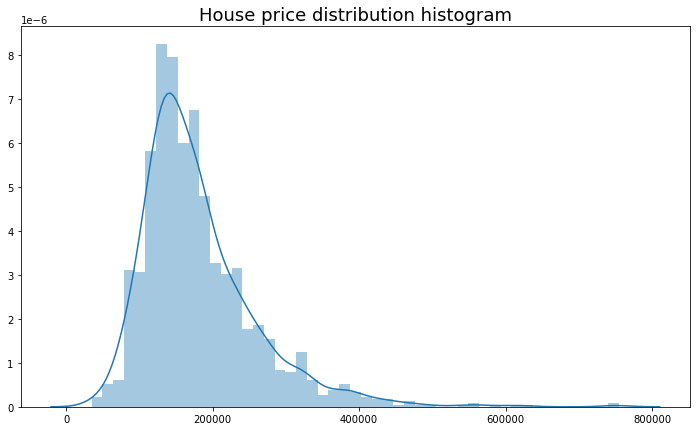

In [82]:
# we have a positive skew, must fix

plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice']).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()

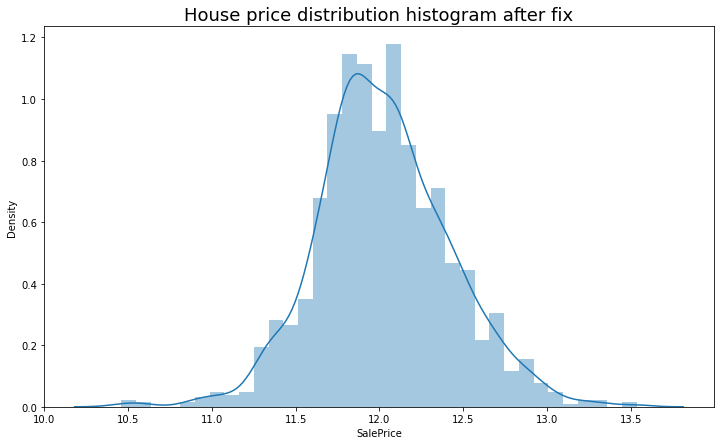

In [83]:
train['SalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice'])
plt.title('House price distribution histogram after fix', fontsize=18)
plt.show()

In [84]:
from xgboost.sklearn import XGBRegressor


xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

xgboost.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score, KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def cv_rmse(model, features=features):
    rmse = np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

from datetime import datetime

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

[18:57:59] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:23] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

# Light GBM and doing a blend

In [75]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 196 kB/s eta 0:00:01


In [76]:
from lightgbm import LGBMRegressor
                                              
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

OSError: dlopen(/Users/anna-stinareinas/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/anna-stinareinas/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [87]:
# Combining scores to create blend

print ("Training score:", xgboost.score(X_train,y_train), "Test Score:",xgboost.score(X_test,y_test))
print ("Training score:", LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

Training score: 0.9668243422289475 Test Score: 0.9754193806485013
Training score: 0.9999640113428064 Test Score: 0.8816759772317874


Result is only a little bit better than xgboost.

<br>

In [88]:
# Testing on actual test data for Kaggle (blend of lgbm and xgboost)

y_pred_xgb  = pd.DataFrame( xgboost.predict(test))
y_pred_lgbm = pd.DataFrame( LGBM.predict(test))

y_pred=pd.DataFrame()
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

y_pred.to_csv('xgboost_LGBM_blend.csv',index=False)

In [89]:
# Testing on actual test data for Kaggle (xgboost)

pred = xgboost.predict(test)
xgboostdata = pd.DataFrame(data = {"Id":test["Id"], "SalePrice": pred})
xgboostdata.to_csv(r'/Users/koldekiv/Desktop/xgboost.csv', index = False)